# Médias Móveis

`Média Móvel` é um indicador de seguimento de tendência.

As duas médias móveis mais usadas são a **média móvel simples (SMA - Simple Moving Average)**, que é a média simples dos preços de um ativo em um número definido de períodos de tempo, e a **média móvel exponencial (EMA - Exponencial Moving Average)**, que dá maior peso aos preços mais recentes.

As aplicações mais comuns das médias móveis são identificar a direção da tendência, determinar os níveis de suporte e resistência e o cruzamento de duas médias diferentes (uma mais curta e outra mias longa).

Embora as médias móveis sejam suficientemente úteis por si só, elas também formam a base para outros indicadores técnicos, como o **MACD** e as **Bandas de Bollinger** (os quais veremos adiante).

In [23]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
# Datasource
ds_yahoo = 'yahoo'

# Período de um ano atrás a partir de hoje
last_year = datetime.datetime.now().year - 3
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

In [32]:
petrobras = web.DataReader('PETR3.SA', ds_yahoo, start, end)
ambev = web.DataReader('ABEV3.SA', ds_yahoo, start, end)

In [38]:
ambev['9-SMA'] = ambev['Adj Close'].rolling(window = 9).mean()
ambev['21-SMA'] = ambev['Adj Close'].rolling(window = 21).mean()
ambev['50-SMA'] = ambev['Adj Close'].rolling(window = 50).mean()
ambev['200-SMA'] = ambev['Adj Close'].rolling(window = 200).mean()

In [34]:
petrobras['9-SMA'] = petrobras['Adj Close'].rolling(window = 9).mean()
petrobras['21-SMA'] = petrobras['Adj Close'].rolling(window = 21).mean()
petrobras['50-SMA'] = petrobras['Adj Close'].rolling(window = 50).mean()
petrobras['200-SMA'] = petrobras['Adj Close'].rolling(window = 200).mean()

In [31]:
ambev.head(30)

,High,Low,Open,Close,Volume,Adj Close,9-SMA,21-SMA,50-SMA,200-SMA
Date,,,,,,,,,,
2016-07-18,19.100000,18.910000,18.950001,19.059999,11617600.0,17.559162,NaN,NaN,NaN,NaN
2016-07-19,19.190001,18.969999,19.049999,19.170000,8953000.0,17.660505,NaN,NaN,NaN,NaN
2016-07-20,19.260000,19.010000,19.120001,19.120001,9986500.0,17.614445,NaN,NaN,NaN,NaN
2016-07-21,19.250000,18.950001,19.120001,19.200001,7734400.0,17.688141,NaN,NaN,NaN,NaN
2016-07-22,19.459999,19.110001,19.240000,19.389999,8907900.0,17.863180,NaN,NaN,NaN,NaN
2016-07-25,19.420000,19.190001,19.320000,19.389999,9501100.0,17.863180,NaN,NaN,NaN,NaN
2016-07-26,19.520000,19.200001,19.400000,19.350000,7397400.0,17.826332,NaN,NaN,NaN,NaN
2016-07-27,19.450001,19.260000,19.450001,19.320000,6281700.0,17.798693,NaN,NaN,NaN,NaN
2016-07-28,19.459999,19.219999,19.299999,19.440001,7435300.0,17.909243,17.753653,NaN,NaN,NaN


## Gráfico das Médias Móveis

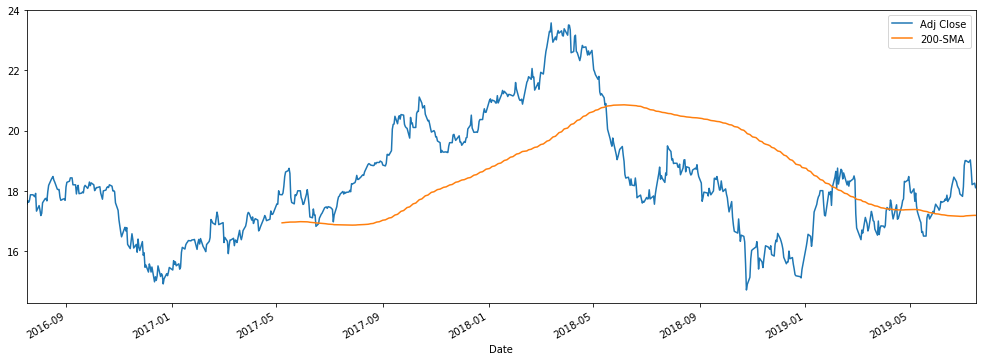

In [39]:
ambev[['Adj Close', '200-SMA']].plot(figsize=(17,6));

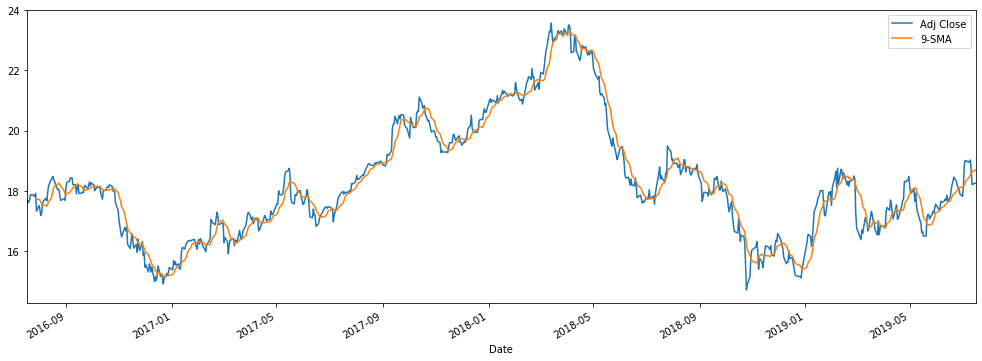

In [8]:
ambev[['Adj Close', '9-SMA']].plot(figsize=(17,6));

## Exemplo de Uso das Médias Móveis

## Suporte e Resistência

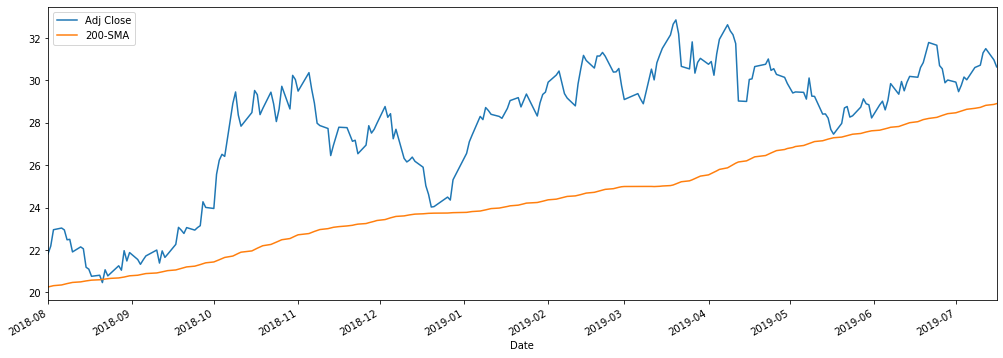

In [43]:
petrobras[['Adj Close', '200-SMA']]['2018-08':].plot(figsize=(17,6));

## Cruzamento das Médias

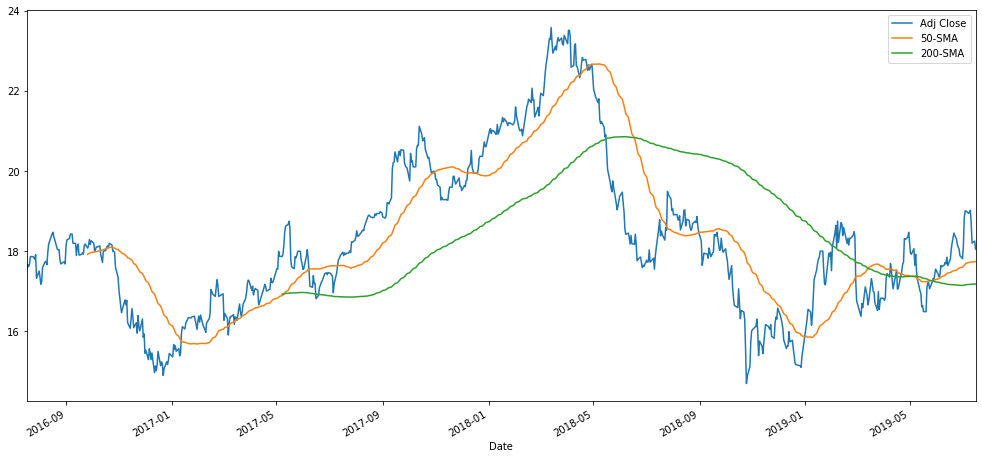

In [30]:
ambev[['Adj Close', '50-SMA', '200-SMA']].plot(figsize=(17,8));